# Tutorial: Classifying Higgs Boson Production Mechanisms

In this tutorial, we tackle a **real-world problem in high-energy physics**:  
**determining how a Higgs boson was produced** in proton-proton collisions at the LHC.

Unlike typical classification problems where we distinguish between Higgs vs. non-Higgs events, our task here is to distinguish between **two types of Higgs production**:

---

## Higgs Boson Production Modes

The Higgs boson, discovered in 2012, is responsible for giving mass to elementary particles. At the LHC, it can be produced through several mechanisms.  
We focus on the two dominant processes:

### Gluon-Gluon Fusion (ggF)
- Two gluons (from each incoming proton) fuse to create a Higgs boson.
- This is the **most common** production mode.

### Vector Boson Fusion (VBF)
- A quark from each proton radiates a **vector boson** (W or Z).
- These vector bosons fuse to form a Higgs.
- VBF is rarer but **sensitive to new physics** because it probes Higgs–vector boson couplings.

---

## Feynman Diagrams

![Feynman Diagrams](./higgs_clf_lecture2.png)

This Figure shows:
- (left) **Gluon-gluon fusion**: two gluons fuse to form a Higgs boson.
- (right) **Vector boson fusion**: each proton emits a vector boson, and those fuse into a Higgs.

These diagrams visualize **what happens at the quantum level** inside the LHC detector.  
Identifying these processes is crucial for measuring the Higgs boson’s properties and **searching for deviations from the Standard Model**.

---

## The Goal

Our aim is to train a classifier that can distinguish between **ggF** and **VBF** Higgs production events.

These two processes produce Higgs bosons with **different final-state characteristics**, such as:
- Jet multiplicity
- Jet rapidity gaps
- Missing transverse energy (MET)
- Transverse momentum of the Higgs system

Using these features, we aim to build a model that can **predict the production mode** of each event.

---

## Where to Find the Dataset

The dataset used in this tutorial is available in **[Data ATLAS Higgs](https://drive.google.com/drive/folders/1b_GDA2bfsUhlvzX-A7RjHoHCL5Z8-bkb)**.

It contains:
- Detector-level features from Higgs events
- A label indicating whether the Higgs was produced via **ggF** or **VBF**

> If you downloaded the dataset locally, make sure to load it using `pandas.read_csv()` and inspect the features and class balance before training.

---

Let’s get started by loading and exploring the dataset!


In [1]:
import pandas as pd

# Read the data
df = pd.read_csv("ATLAS_higgs.csv")
print(df.head())

      Z1mass     Z2mass    detajj      massjj  l1pdgid     l1eta     l1phi  \
0  68.515258  57.174385  4.283580  556.406882      -11  0.490221 -2.302279   
1  84.330551  25.551337  1.101106  266.768190      -11  1.291437  1.917571   
2  90.902327  30.404745  2.394863  211.879331      -13  0.702544 -0.946013   
3  91.129112  26.609989  1.040268   56.235126      -11 -2.450392  3.123466   
4  87.525977  32.304742  3.674720  351.241850       11 -1.303559  0.963711   

        l1pt  l2pdgid     l2eta  ...       l2pt  l3pdgid     l3eta     l3phi  \
0  68.776711      -11  0.910430  ...  50.775758       11 -0.495413 -1.409834   
1  77.658719       11  0.142028  ...  61.922754      -13  0.208367  1.411837   
2  91.046750       13  0.958006  ...  32.417166       11  0.385190  0.934649   
3  58.988305       11 -1.276226  ...  30.001736      -13 -1.275654  0.280533   
4  66.502133      -11 -0.254885  ...  26.519908      -13 -1.052104  0.041387   

        l3pt  l4pdgid     l4eta     l4phi       l4

In [2]:
# The sample column currently uses 1 for one class and -1 for the other, 
# but for most ML workflows, it's better to map the labels to 0 and 1.

# Replace -1 with 0 to make labels binary (0 and 1)
df['sample'] = df['sample'].replace({-1: 0})

## Training a Perceptron on Higgs Production Mechanisms

We now apply our custom `Perceptron` model to classify between **gluon-gluon fusion (ggF)** and **vector boson fusion (VBF)** production modes.

### Steps

1. Extract features (`X`) and target (`y` = `sample`).
2. Split the data into training and testing sets (80/20).
3. Train the `Perceptron` model using 50 epochs and a learning rate of 0.01.
4. Predict on the test set and calculate accuracy.
5. Plot the number of misclassifications at each epoch to visualize learning progress.

### Learning Curve

The curve shows how the model’s predictions improve (or not) over time. A steadily decreasing trend means the model is learning effectively.

> Note: The Perceptron only works well if the data is **linearly separable**. For more complex patterns (like in Higgs classification), performance might plateau early.


Test Accuracy (Perceptron): 61.60 %


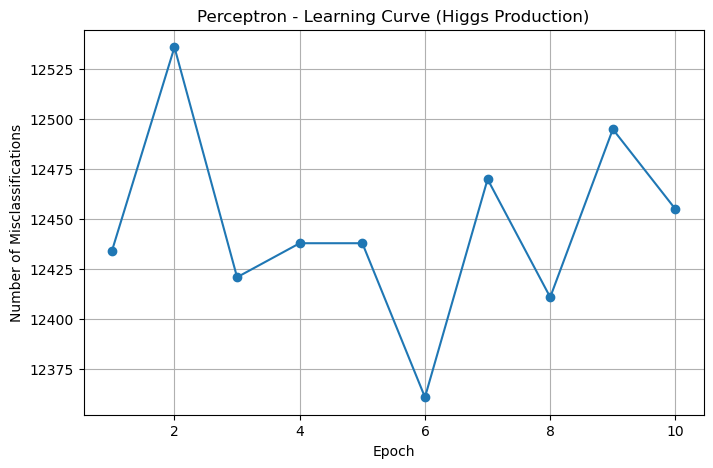

In [7]:
# Usual imports as before
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from models import Perceptron 

# Features and labels as before
X = df.drop(columns=['sample']).values
y = df['sample'].values

# Split data into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize and train Perceptron
ppn = Perceptron(eta=0.01, n_epochs=10, random_state=1)
ppn.fit(X_train, y_train)

# Predict and evaluate
y_pred = ppn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy (Perceptron): {acc*100:.2f} %")

# Plot training loss (misclassifications per epoch)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Misclassifications')
plt.title('Perceptron - Learning Curve (Higgs Production)')
plt.grid(True)
plt.show()

## Adaline with Sigmoid Activation and Feature Scaling

In this step, we apply the **AdalineGD** model to classify Higgs production mechanisms. To improve learning, we:

- **Standardize the input features** using `StandardScaler`
- Use a **sigmoid activation function** instead of the default linear one


### Results

- We split the data into 80% training and 20% testing.
- Trained Adaline for 50 epochs.
- Plotted the **mean squared error (MSE)** per epoch to visualize convergence.

This approach provides a **non-linear decision function**, while keeping the training pipeline simple.

Test Accuracy (Adaline + Sigmoid): 62.54 %


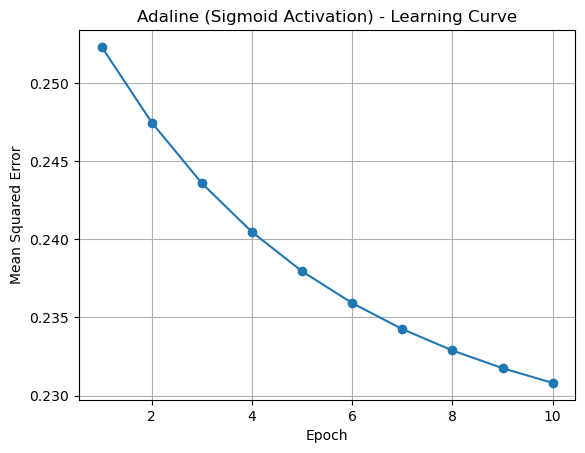

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from models import AdalineGD

# As before: Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Features and labels
X = df.drop(columns=['sample']).values
y = df['sample'].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Train Adaline with sigmoid activation
ada = AdalineGD(eta=0.1, n_iter=10, random_state=1, activation=sigmoid)
ada.fit(X_train, y_train)

# Now Evaluate
y_pred = ada.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy (Adaline + Sigmoid): {acc*100:.2f} %")

# Plot loss curve
plt.plot(range(1, len(ada.losses_) + 1), ada.losses_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Adaline (Sigmoid Activation) - Learning Curve')
plt.grid(True)
plt.show()
